In [1]:
import numpy as np

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

In [3]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [4]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [5]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

,criterion,'squared_error'
,splitter,'best'
,max_depth,2
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [6]:
X_new = np.array([[-0.4], [0.], [0.5]])
sum(tree.predict(X_new) for tree in [tree_reg1, tree_reg2, tree_reg3])


array([0.49484029, 0.04021166, 0.75026781])

In [7]:
import matplotlib.pyplot as plt


def plot_predictions(regressors, X, y, axes, style, label=None, data_style="b.", data_label=None):
	x1 = np.linspace(axes[0], axes[1], 500)
	y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)

	plt.plot(X[:, 0], y, data_style, label=data_label)
	plt.plot(x1, y_pred, style, linewidth=2, label=label)
	if label or data_label:
		plt.legend()
	plt.axis(axes)


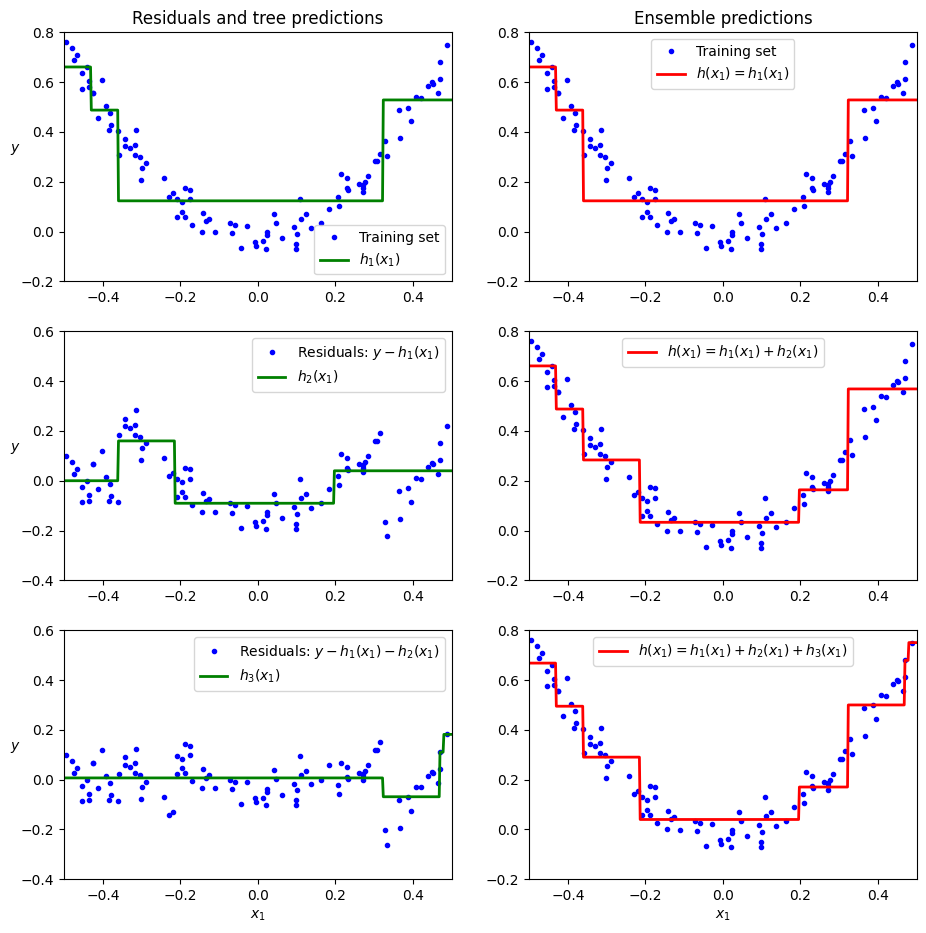

In [8]:
plt.figure(figsize=(11, 11))

configs = [
	(3, 2, 1, [tree_reg1], X, y, [-0.5, 0.5, -0.2, 0.8], "g-", "$h_1(x_1)$", "Training set", "$y$",
	 "Residuals and tree predictions"),
	(3, 2, 2, [tree_reg1], X, y, [-0.5, 0.5, -0.2, 0.8], "r-", "$h(x_1) = h_1(x_1)$", "Training set", None,
	 "Ensemble predictions"),
	(3, 2, 3, [tree_reg2], X, y2, [-0.5, 0.5, -0.4, 0.6], "g-", "$h_2(x_1)$", "Residuals: $y - h_1(x_1)$", "$y$", None),
	(3, 2, 4, [tree_reg1, tree_reg2], X, y, [-0.5, 0.5, -0.2, 0.8], "r-", "$h(x_1) = h_1(x_1) + h_2(x_1)$", None, None,
	 None),
	(3, 2, 5, [tree_reg3], X, y3, [-0.5, 0.5, -0.4, 0.6], "g-", "$h_3(x_1)$", "Residuals: $y - h_1(x_1) - h_2(x_1)$",
	 "$y$", None),
	(3, 2, 6, [tree_reg1, tree_reg2, tree_reg3], X, y, [-0.5, 0.5, -0.2, 0.8], "r-",
	 "$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$", None, None, None)
]

for config in configs:
	rows, cols, index, models, x, y_data, axes, style, label, data_label, ylabel, title = config
	plt.subplot(rows, cols, index)
	plot_predictions(models, x, y_data, axes=axes, style=style, label=label, data_label=data_label)
	if ylabel:
		plt.ylabel(ylabel, rotation=0)
	if title:
		plt.title(title)
	if index >= 5:  # Add xlabel only for the last row
		plt.xlabel("$x_1$")

plt.show()

In [9]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(
	max_depth=2,
	n_estimators=3,
	learning_rate=1.0,
	random_state=42
)
gbrt.fit(X, y)

,loss,'squared_error'
,learning_rate,1.0
,n_estimators,3
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [10]:
gbrt_best = GradientBoostingRegressor(
	max_depth=2,
	learning_rate=0.05,
	n_estimators=500,
	n_iter_no_change=10,
	random_state=42
)
gbrt_best.fit(X, y)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


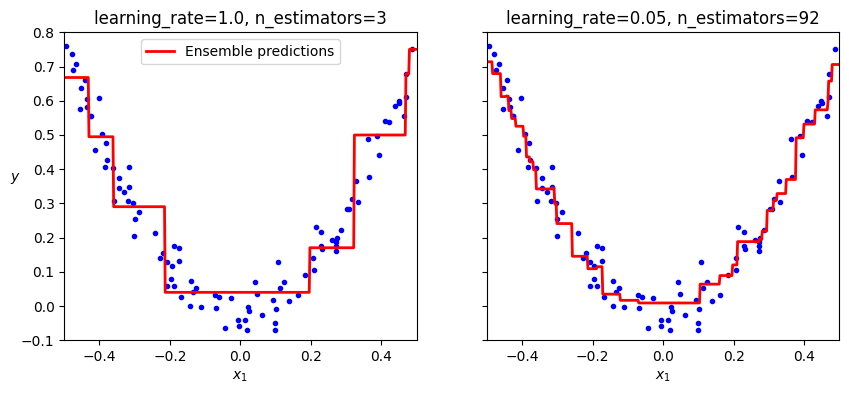

In [12]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
axes_lims = [-0.5, 0.5, -0.1, 0.8]
plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=axes_lims, style="r-",
				 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
		  f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=axes_lims, style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
		  f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

plt.show()


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth=2, n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,np.int64(56)
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,2
,min_impurity_decrease,0.0
,init,None


In [16]:
min_error = np.min(errors)

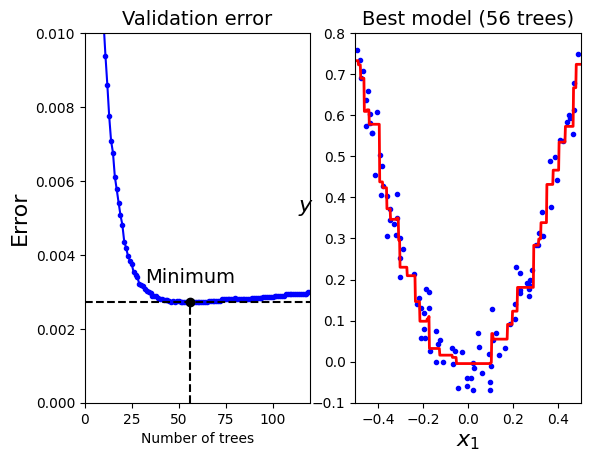

In [23]:
plt.subplot(121)
plt.plot(np.arange(1, len(errors) + 1), errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error * 1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.ylabel("Error", fontsize=16)
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=axes_lims, style="r-")
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.xlabel("$x_1$", fontsize=16)

plt.show()

It is also possible to implement early stopping by actually stopping training early (instead of training a large number of trees first and then looking back to find the optimal number). You can do so by setting `warm_start=True`, which makes Scikit-learn keep existing trees when the `fit()` method is called, allowing incremental training. The following code stops training when the validation error doesn't improve for five iterations in a row

In [26]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
	gbrt.n_estimators = n_estimators
	gbrt.fit(X_train, y_train)
	y_pred = gbrt.predict(X_val)
	val_error = mean_squared_error(y_val, y_pred)
	if val_error < min_val_error:
		min_val_error = val_error
		error_going_up = 0
	else:
		error_going_up += 1
		if error_going_up == 5:
			break


In [27]:
print(gbrt.n_estimators)


61


In [28]:
print("Minimum validation MSE:", min_val_error)


Minimum validation MSE: 0.002712853325235463


It is worth noting that an optimized implementation of Gradient Boosting is available in the popular Python library XGBoost, which stand for Extreme Gradient Boosting.

In [33]:
import xgboost

xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
val_error

3.0.2


0.004644479346317078

In [34]:
xgb_reg = xgboost.XGBRegressor(early_stopping_rounds=2)
xgb_reg.fit(X_train, y_train, eval_set=[(X_val, y_val)])
y_pred = xgb_reg.predict(X_val)
val_error = mean_squared_error(y_val, y_pred)
val_error

[0]	validation_0-rmse:0.15232
[1]	validation_0-rmse:0.10690
[2]	validation_0-rmse:0.07868
[3]	validation_0-rmse:0.06385
[4]	validation_0-rmse:0.05656
[5]	validation_0-rmse:0.05486
[6]	validation_0-rmse:0.05394
[7]	validation_0-rmse:0.05556
[8]	validation_0-rmse:0.05682


0.0029091166440151123